## **Linear Regression with Python**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Vaishali Gupta


## Linear Regression
- This is the go to method for regression problems. The linear regression algorithm is
used to see a relationship between the predictor variables and explanatory variable. This
relationship is either a positive, negative, or neutral change between the variables. In its
simplest form, it attempts to fit a straight line to your training data. This line can then be
used as reference to predict future data.
Imagine you’re an ice cream man. Your intuition from previous sales was that you found
yourself selling more ice cream when it
was hotter outside. Now we want to know
how much to sell your ice cream at a
certain temperature. We can use linear
regression to predict just that!
- The linear regression algorithm is represented as a
formula: **y = mx + b**. Where “y” is your
dependent variable (ice cream sales) and
“x” is your independent variable (temperature).

**Example:** If the temperature is about 75 degrees outside, you would then sell the ice
cream at about $150. This shows that as temperature increases, so does ice cream sales.

**Strengths:** Linear regression is very fast to implement, easy to understand, and is less
prone to overfitting. It’s a great go-to algorithm for using it as your first model and works
really on linear relationships

**Weaknesses:** 
- Linear regression performs poorly when there are non-linear relationships.
- It is hard to be used on complex data sets.
- Linear regression is very sensitive to outliers. 

**Assumptions of Linear Regression**
1. Linear Relationship
    It states that the dependent and independent variables should be linearly related. We can use scatter plots to visualize if there is a linear relationship between variables or not. It is important to check this assumption because if you fit a linear model to a non-linear one, the regression algorithm would fail to capture the trend. 
2. Normal Distribution of Residuals
    All the residuals or error terms should be normally distributed. If residuals are non-normally distributed, the estimation may become too wide or narrow. To check the normal distribution, we can use following methods: 
    - Distribution Plots
    - Q-Q Plots
3. Multicollinearity
    There should be less or no multicollinearity in the given dataset. This situation occurs when the features or independent variables of a given dataset are highly correlated to each other. The standard errors tend to increase due to the presence of correlated variables. We can test multicollinearity by using the following approaches.
    - Correlation Matrix
    - Tolerance
    - Variance Inflation Factor
4. Autocorrelation
    Autocorrelation occurs when residuals or error terms are not independent of each other. To check the autcorrelation we can use residual time series plot or Durbin-Watson test. Residual time series plot is a plot of residuals vs. time.
5. Homoscedasticity

### Importing libraries

- pandas is used for data analysis and associated manipulation of tabular data in Dataframes.


In [20]:
import pandas as pd

- NumPy is used to perform a wide variety of mathematical operations on arrays.

In [21]:
import numpy as np 

- Matplotlib is one of the most popular Python packages used for data visualization. 
- It is a cross-platform library for making 2D plots from data in arrays.

In [22]:
import matplotlib.pyplot as plt  
%matplotlib inline

In [23]:
# Reading data from path
path = 'student_scores.csv'
s_data = pd.read_csv(path)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

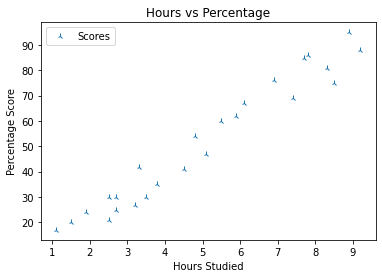

In [24]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='2')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show() #show() function in pyplot module of matplotlib library is used to display all figures.

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

- Positive linear regression 
    - If r is positive, then as one variable increases, the other tends to increase.
- Negative linear regression
    -  If r is negative, then as one variable increases, the other tends to decrease.
- Neutral linear regression
    -  If r is 0, then as one variable increases, the other tends to remain constant.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [25]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [26]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [27]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method: we will split train and test data into 70:30 ratio.
This we will do by defining test_size=0.3 or train_size=0.7. 

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


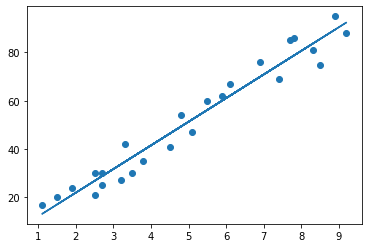

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [14]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


In [15]:
# You can also test with your own data
hours = [[10.1]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[10.1]]
Predicted Score = 101.23533891850724


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


### Decision tree regression

In [17]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train) 



DecisionTreeRegressor(random_state=0)

In [18]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict([[6],[7],[8],[9],[9.25]])
                                                          
# print the predicted price
print("student score:", y_pred)


student score: [67. 76. 85. 95. 88.]


In [19]:
y_pred=regressor.predict(X_test)
print(X_test)  
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17. 42. 85. 21. 67. 30. 21. 85.]
